# Data Cleaning, Feature Engineering, EDA Notebook

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from scotus_class import scotus

In [2]:
df = pd.read_csv('scotus_rulings.csv', index_col=0)

## Clean data and engineer metric
As seen by the sample rows, a justice can hold multiple opinions on a case.  They can simultaneously agree with the decision of the majority opinion but hold a separate reasoning(s) on the ruling (filing a concurrence).  With 1 being agreement and 2 filing a concurrence (and similarly 4 being dissent and 3 filing a concurrence/dissent).  The metric used here tries to capture the difference between those opinions by finding the mean of a justice's opinion (while removing filing multiple concurrences/dissents in a specific case).

In [3]:
# Map code string to metric function
def string_2_ints(s):    
    # Special case 'X' is no vote
    if s is np.nan:
        return np.nan
    if s == 'X':
        return np.nan
    
    # Split and remove non-integers, simplify to either majority or dissent
    nums = []
    for x in set(list(s)):
        try:
            nums.append(int(x))
        except:
            continue
    
    return np.mean(nums)

In [4]:
adj_df = pd.DataFrame(np.vectorize(string_2_ints)(df), index=df.index)

In [5]:
adj_df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,1638,1639,1640,1641,1642,1643,1644,1645,1646,1647
Alito,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,4.0,3.0,1.0,1.0,1.0,2.0,1.0,1.5,1.0
Breyer,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.5,...,1.0,1.0,1.0,1.0,2.0,3.0,1.0,4.0,4.0,4.0
Ginsburg,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.5,...,1.0,1.0,1.0,1.0,2.0,3.0,1.0,4.0,4.0,1.0


## Scotus Rulings Class Object
A class object was created in order to encapsulate data in the file ```scotus_class.py```.  The methods return various forms of data including courts of justices (as old ones retire and new ones are appointed) allowing for easy comparisons for EDA and in a dashboard.

In [6]:
scotus = scotus(adj_df)

## EDA

In [7]:
sim_mat = pd.DataFrame(scotus.sim_matrix(), index=adj_df.index, columns=adj_df.index)

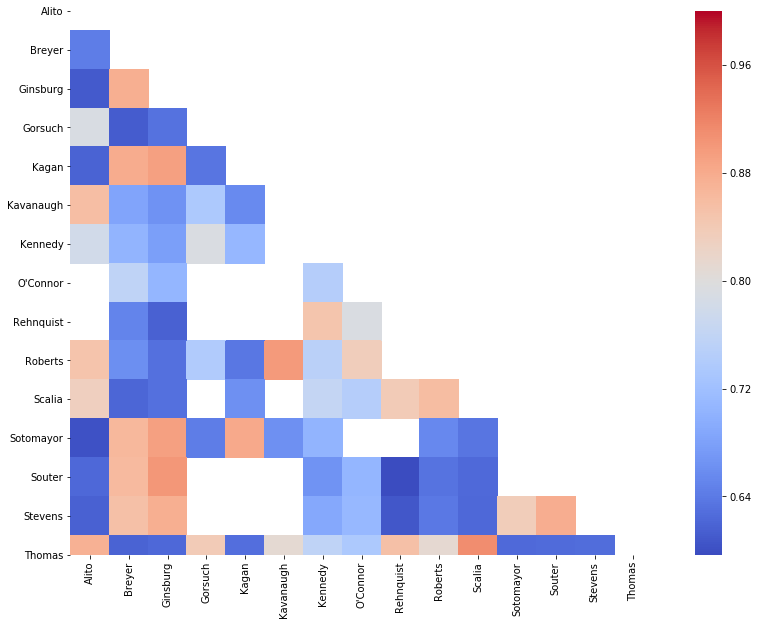

In [8]:
plt.figure(figsize=(15,10))
mask = np.zeros(sim_mat.shape, dtype=bool)
mask[np.triu_indices(len(mask))] = True
sns.heatmap(sim_mat, cmap='coolwarm', mask=mask, square=True)
plt.show()

In [11]:
comps = scotus.two_dim_court(0)

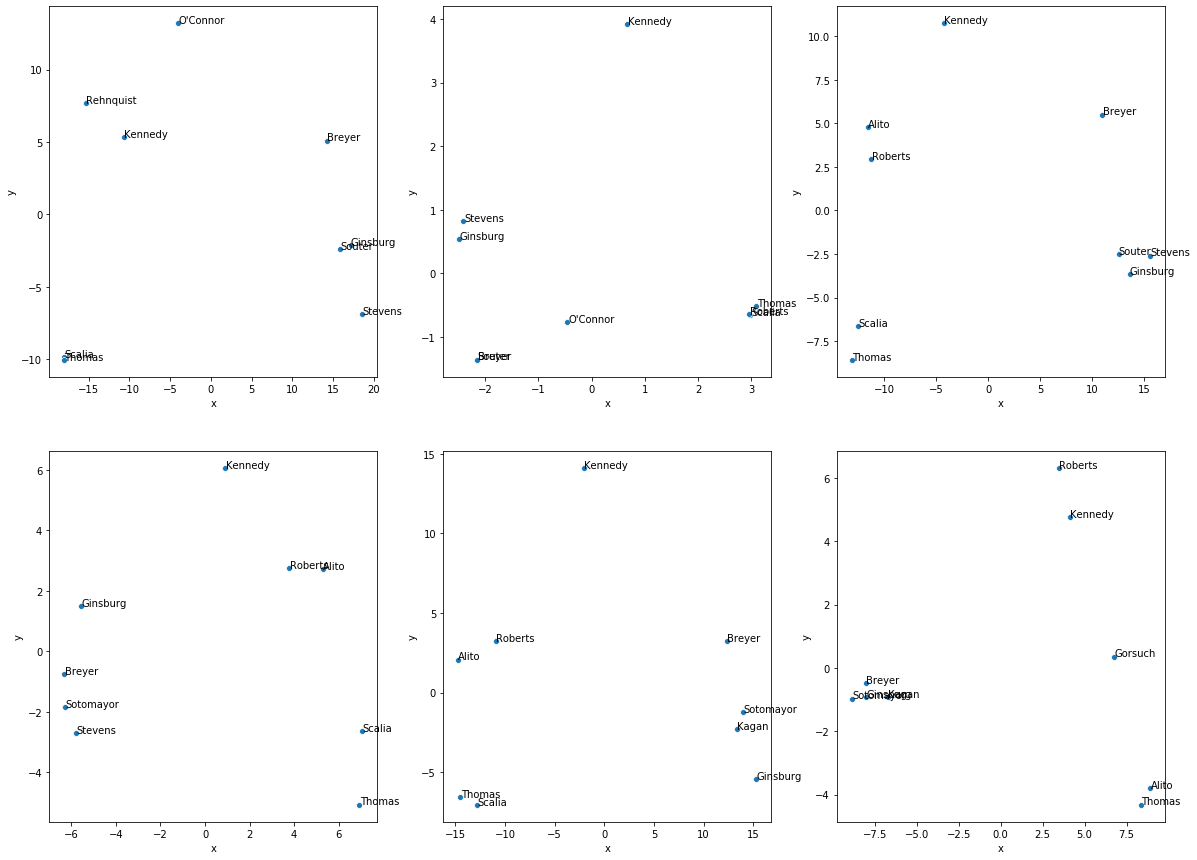

In [54]:
n = 0
fig, axes = plt.subplots(2, 3, figsize=(20,15))
for row in range(2):
    for col in range(3):
        comps = scotus.two_dim_court(n)
        sns.scatterplot(x='x', y='y', data=comps, ax=axes[row, col])
        for i, point in comps.iterrows():
            axes[row, col].text(point['x']+.02, point['y'], str(point['justice']))
        n += 1

1